In [1]:
%autosave 0
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)

Autosave disabled


## Complejidad y Sobreajuste

El principal desafio del Aprendizaje Supervisado es lograr un buenas predicciones en datos que no se han visto anteriormente. En otras palabras, en datos con los cuales el modelo **no fue entrenado**.

Para entrenar y evaluar un modelo, se dividen los datos en 2 grupos excluyentes:
- Set de Entrenamiento (Train Set)
- Set de Prueba (Test Set)

![alt text](train-test.png "Title")

Comunmente se utiliza una proporcion 80-20 para la division, con mayoria en el set de entrenamiento. 

Generalmente la asignacion de cada dato a uno de los 2 sets se hace al azar con distribucion uniforme.

In [2]:
from sklearn.model_selection import train_test_split

X = [np.random.randint(10) for i in range(10)] 
y = [np.random.randint(2) for i in range(10)] 

print("X =", X)
print("y =", y)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X_train =", X_train)
print("y_train =", y_train)


print("X_test =", X_test)
print("y_test =", y_test)

X = [6, 9, 0, 5, 6, 0, 5, 1, 3, 4]
y = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]

X_train = [3, 4, 0, 9, 0, 5, 6]
y_train = [1, 0, 0, 1, 0, 0, 1]
X_test = [6, 5, 1]
y_test = [1, 0, 1]


[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Subdividir el dataset nos permite entrenar y evaluar varios modelos ajustados a los mismos datos de tal manera que puedan ser comparables.

Es de suma importancia no entrenar con el set de prueba durante el periodo de evaluacion de modelos para mantener la integridad del esquema. Pues con este set, se determinara la capidad de **generalizacion** del modelo.

Pero, Que asegura que entrenando con el set de entrenamiento el modelo pueda **generalizar** al set de prueba, y por ende, a escenarios del mundo real?

Esto es debido a que se asume que ambos sets provienen de la misma **distribucion generadora**. Tambien se asume que cada $x_i$ es **i.i.d.**

Los factores que determinan que tan buen rendimiento tendra un algoritmo son:
- Lograr un bajo Error de Entrenamiento.
- Lograr una baja diferencia entre el error de entrenamiento y el error de prueba.

Estos 2 factores estan directamente relacionados a 2 desafios en Machine Learning.
- Underfitting
- Overfitting

![alt text](underf-overf.svg "Title")

<IPython.core.display.Javascript object>


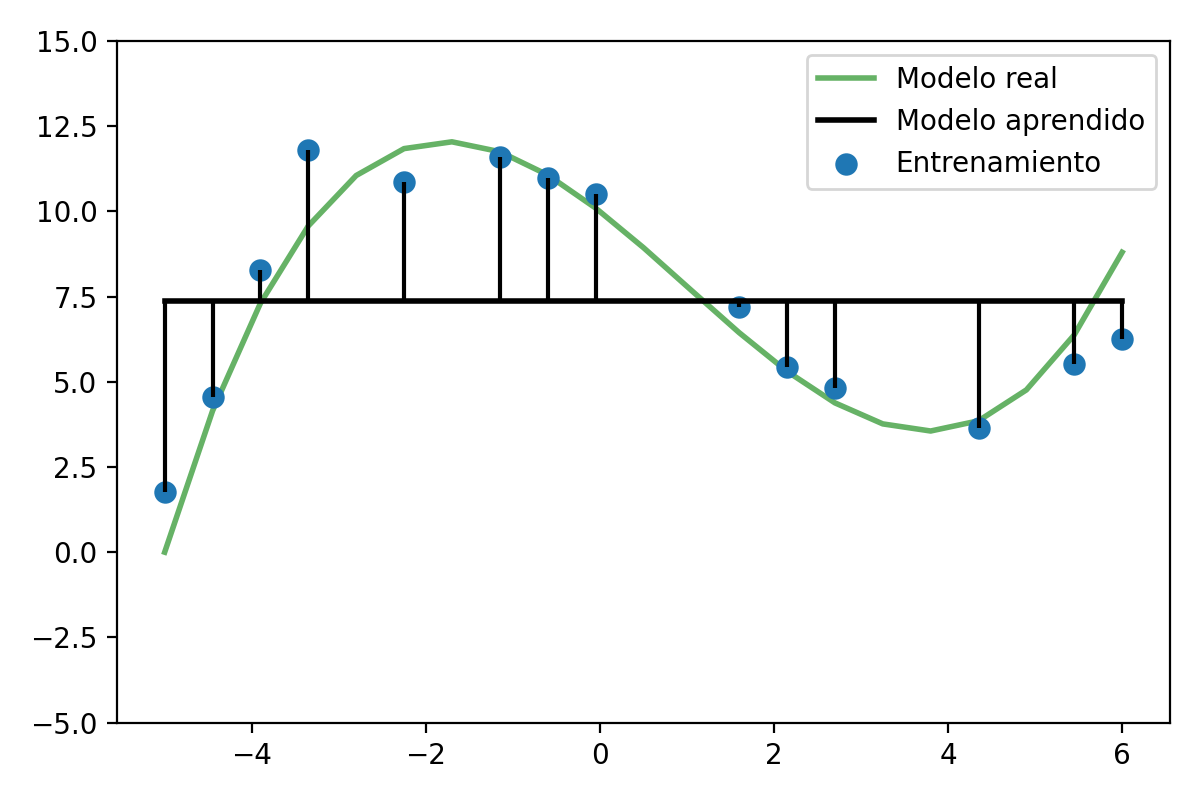

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [3]:
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
theta_real = np.array([10, -2, -0.3, 0.1])

x = np.linspace(-5, 6, num=21); 
X = poly_basis(x, len(theta_real))
y = np.dot(X, theta_real)

rseed, sigma = 0, 1.
np.random.seed(rseed);
Y = y + sigma*np.random.randn(len(x))
Y_real = y + sigma*np.random.randn(len(x))


P = np.random.permutation(len(x))
train_idx, valid_idx = P[:2*len(x)//3], P[2*len(x)//3:]

plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

def update_plot(ax, M):
    ax.cla();
    Phi = poly_basis(x, M)
    theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y[train_idx], rcond=None)[0]
    ax.plot(x, y, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')
    #ax.scatter(x[valid_idx], Y[valid_idx], s=50, label='Validación')
    ax.vlines(x[train_idx], np.dot(Phi[train_idx, :], theta_hat), Y[train_idx])  
    #ax.vlines(x[valid_idx], np.dot(Phi[valid_idx, :], theta_hat), Y[valid_idx])     
    x_plot = np.linspace(-5, 6, num=100);
    ax.plot(x_plot, np.dot(poly_basis(x_plot, M), theta_hat), 'k-', linewidth=2, label='Modelo aprendido')
    ax.set_ylim([-5, 15]); plt.legend()
    
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=16));

Una forma de controlar la habilidad de generalizacion del modelo es modificando la **capacidad** de dicho modelo. 
La **capacidad** del modelo se debe escoger correctamente para el problema que queramos solucionar, y estara relacionada a la **complejidad de los datos**. 

La capacidad del modelo esta relacionada directamente al **numero de parametros** de este.

## Regularizacion

Afortunadamente modificar la capacidad del modelo no es la unica forma de evitar el sobreajuste y lograr una buena generalizacion. Otra forma es a traves de la **Regularizacion**.

**Regularizacion** es anadirle preferencias al sistema sobre que soluciones preferir sobre otras.

Una de las mas utilizadas es la regularizacion L2 la cual anade un nuevo termino a la funcion de perdida (Loss function).

$$\mathcal{L} (\theta) = \mathcal{L} (\theta) + \lambda \theta^T \theta$$

donde el termino $\theta^T \theta$ corresponde a la norma L2 al cuadrado de los parametros. Para recordar, si $\theta \in R^2$, entonces $||\theta||_2 = \sqrt{\theta_0^2 + \theta_1^2}$.

Aqui $\lambda$ corresponde a un hiperparametro que regula la cantidad de regularizacion.

<IPython.core.display.Javascript object>


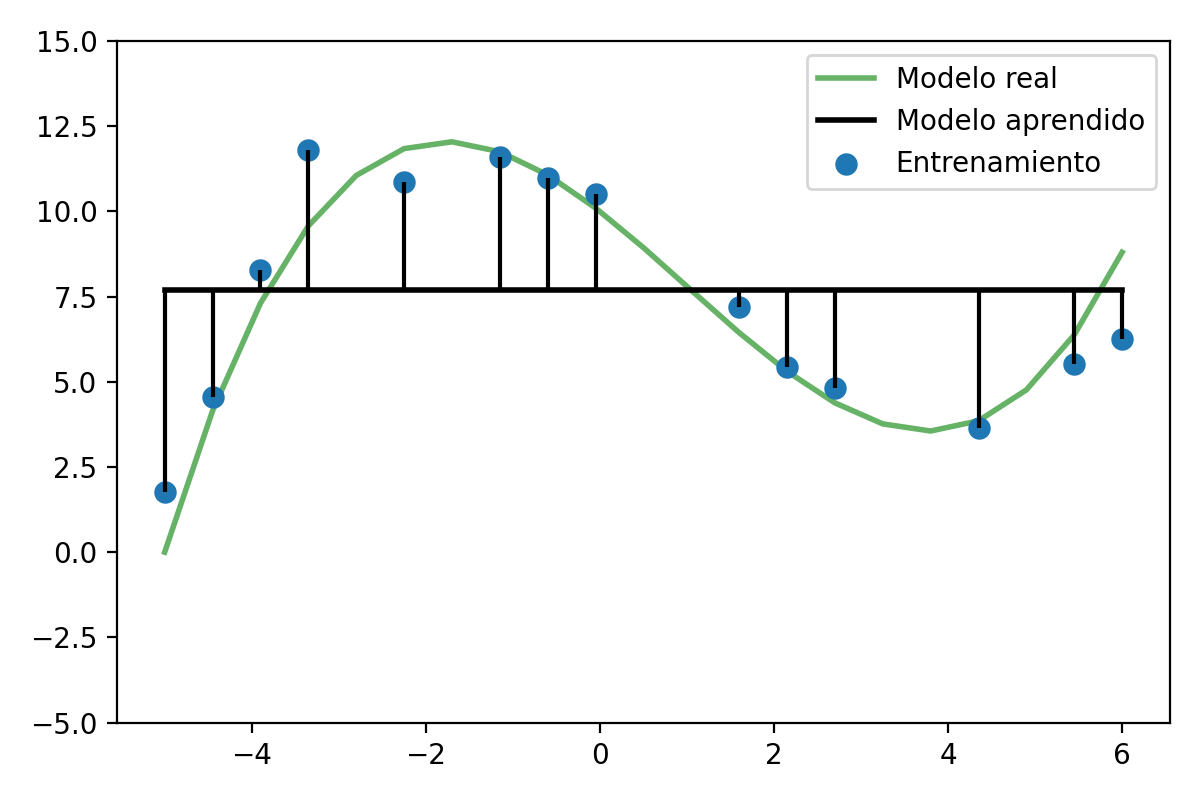

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [4]:
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
theta_real = np.array([10, -2, -0.3, 0.1])

x = np.linspace(-5, 6, num=21); 
X = poly_basis(x, len(theta_real))
y = np.dot(X, theta_real)

rseed, sigma = 0, 1.
np.random.seed(rseed);
Y = y + sigma*np.random.randn(len(x))
Y_real = y + sigma*np.random.randn(len(x))


P = np.random.permutation(len(x))
train_idx, valid_idx = P[:2*len(x)//3], P[2*len(x)//3:]

plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)


def update_plot(ax, M, L):
    ax.cla();
    Phi = poly_basis(x, M)
    print((Phi.T.dot(Phi)).shape)
    theta_hat = np.linalg.inv(Phi.T.dot(Phi)+L*np.identity(M)).dot(Phi.T).dot(Y)
    #theta_hat = np.linalg.lstsq(Phi[train_idx, :], Y[train_idx], rcond=None)[0]
    ax.plot(x, y, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')
    #ax.scatter(x[valid_idx], Y[valid_idx], s=50, label='Validación')
    ax.vlines(x[train_idx], np.dot(Phi[train_idx, :], theta_hat), Y[train_idx])  
    #ax.vlines(x[valid_idx], np.dot(Phi[valid_idx, :], theta_hat), Y[valid_idx])     
    x_plot = np.linspace(-5, 6, num=100);
    ax.plot(x_plot, np.dot(poly_basis(x_plot, M), theta_hat), 'k-', linewidth=2, label='Modelo aprendido')
    ax.set_ylim([-5, 15]); plt.legend()
    
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=20),
                L=FloatSlider_nice(description='Lambda: Regularizacion', min=0, max=3, step=0.001));


## Hiper-Parametros

Los hiperparametros son aquellos parametros que controlan como se comportara nuestro modelo ante los datos. Podemos pensar en ellos como los switches y perillas del panel de control del modelo.

<img src="hiperparam.jpg" alt="drawing" width="400"/>


Algunos ejemplos de hiperparametros son:
- El grado G del polinomio con el que se transforman las caracteristicas de x_i en la regresion lineal
- El valor de $\lambda$ en la regularizacion L2.
- Las funciones en $\Phi$ de la regresion lineal con funciones.

En general, el valor de los hiperparametros los establecemos nosotros como investigadores, sin embargo existen herramientas que nos ayudan a escoger los mejores.

## Regularizacion en Regresion Lineal con Scikitlearn

![ sklearn.linear_model.Ridge ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)

In [9]:
from sklearn.linear_model import Ridge

model = Ridge(alpha = 0)
#model.fit
#model.predict

<IPython.core.display.Javascript object>


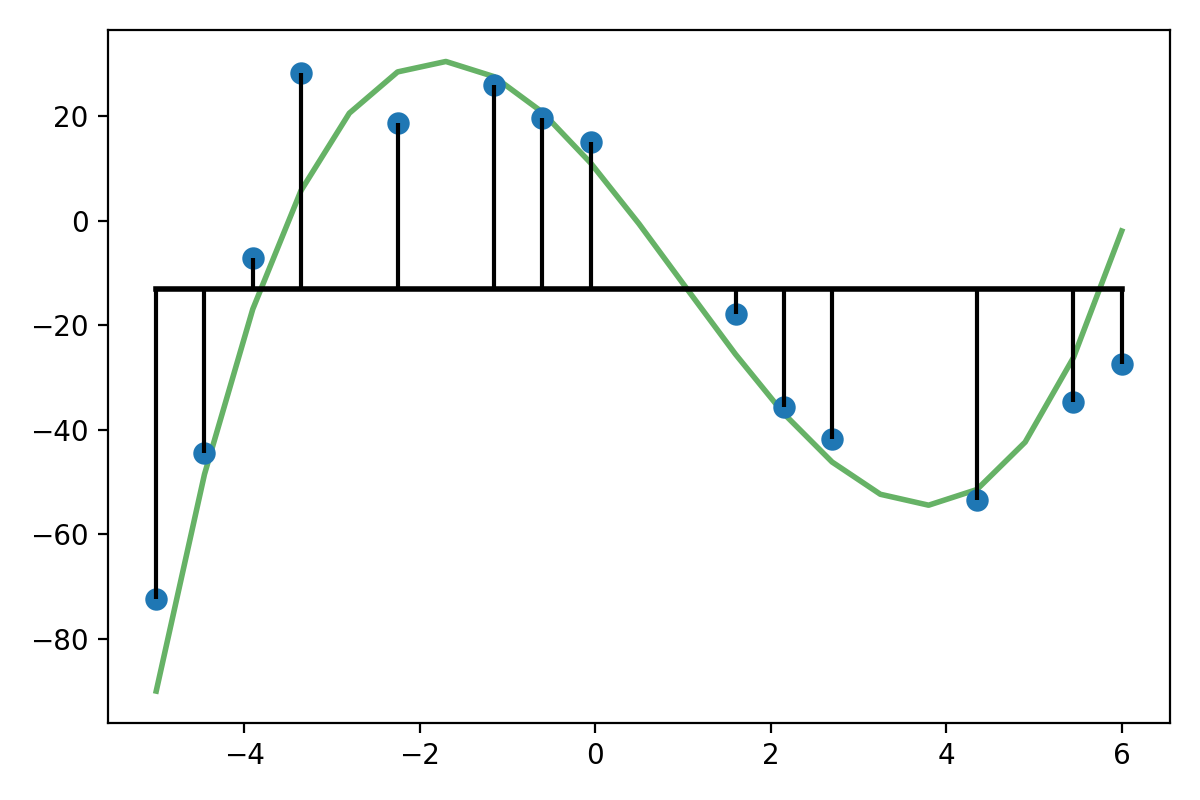

interactive(children=(IntSlider(value=1, description='G: grado del polinomio', layout=Layout(height='20px', wi…

In [32]:
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T
theta_real = np.array([10, -20, -3, 1])

x = np.linspace(-5, 6, num=21); 
X = poly_basis(x, len(theta_real))
y = np.dot(X, theta_real)

rseed, sigma = 0, 1.
np.random.seed(rseed);
Y = y + sigma*np.random.randn(len(x))*10
Y_real = y + sigma*np.random.randn(len(x))


P = np.random.permutation(len(x))
train_idx, valid_idx = P[:2*len(x)//3], P[2*len(x)//3:]

plt.close('all'); fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)


def update_plot(ax, M, L):
    ax.cla();
    
    Phi = poly_basis(x, M)
    model = Ridge(alpha = L)
    model.fit(Phi, Y)

    
    ax.plot(x, y, 'g-', linewidth=2, label='Modelo real', alpha=0.6, zorder=-100)
    ax.scatter(x[train_idx], Y[train_idx], s=50, label='Entrenamiento')
    ax.vlines(x[train_idx], model.predict(Phi[train_idx, :]), Y[train_idx])  
    x_plot = np.linspace(-5, 6, num=100);
    
    
    ax.plot(x_plot, model.predict(poly_basis(x_plot, M)), 'k-', linewidth=2, label='Modelo aprendido')
    #ax.set_ylim([-5, 15]); plt.legend()
    
widgets.interact(update_plot, 
                 ax=widgets.fixed(ax), 
                 M=IntSlider_nice(description='G: grado del polinomio', min=1, max=20),
                 L=FloatSlider_nice(description='Lambda: Regularizacion', min=0, max=20, step=0.001));



In [1]:
%history -g

 1/1:
%autosave 0
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout)
 1/2:
%autosave 0
%matplotlib notebook
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout)
FloatSlider_nice = parti

In [5]:
%history -g -f "Clase 3" 